In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

In [3]:
# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200529_Lick_3-m_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

## Si II 6355

`velocity_rf(6371.359, 6347.103)`

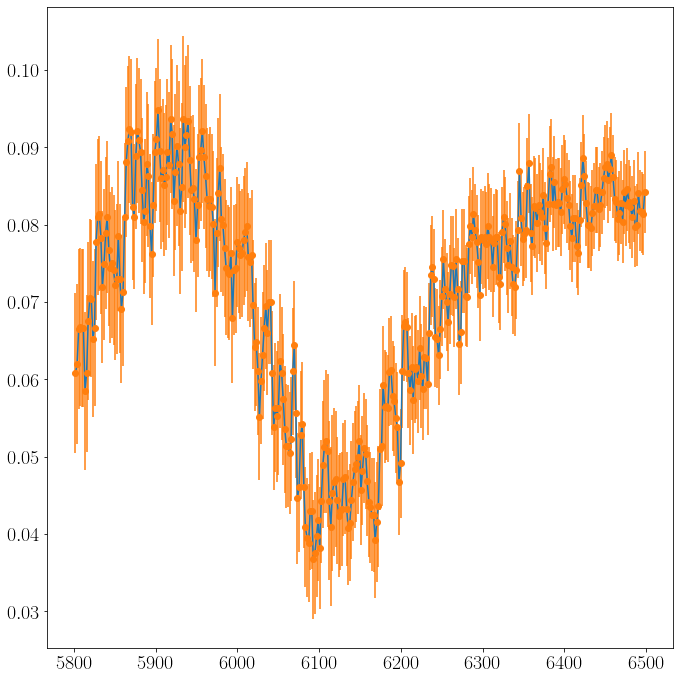

In [4]:
Spec1.plot_line_region(5800, 6500)

In [5]:
Spec1.add_line('SiII_6355', 5900, 6400, lines=[6371.359, 6347.103])

258 points within 5900.00 and 6400.00 angstroms.


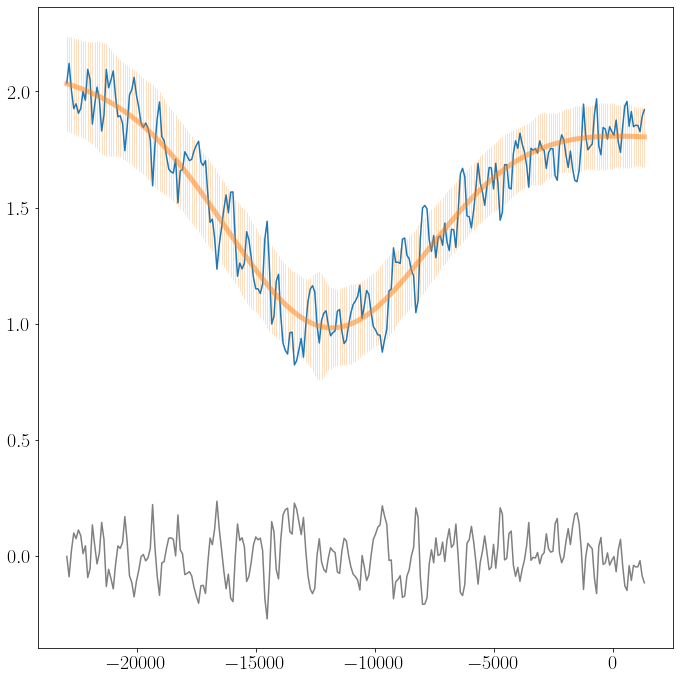

[ 1.81100016e+00  2.06804963e+00 -1.14256754e+04  1.66855430e+01
 -5.14806280e+03]


In [6]:
Spec1.line['SiII_6355'].LS_estimator()

100%|██████████| 1500/1500 [00:15<00:00, 94.36it/s] 


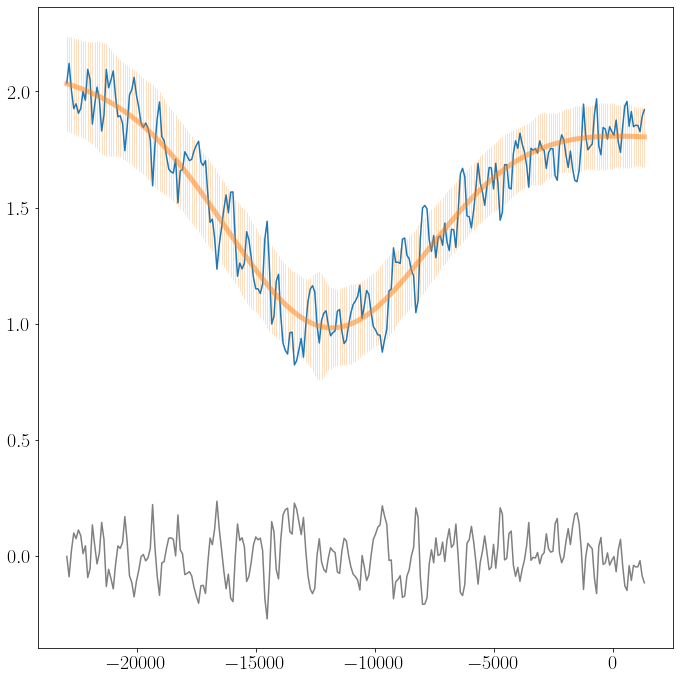

[ 1.80878584e+00  1.98360482e+00 -1.12901093e+04  1.65770613e+01
 -4.67133926e+03] [2.48231324e-02 4.01618497e-02 1.44311233e+02 9.29949869e-02
 2.84861674e+02]


In [7]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler()

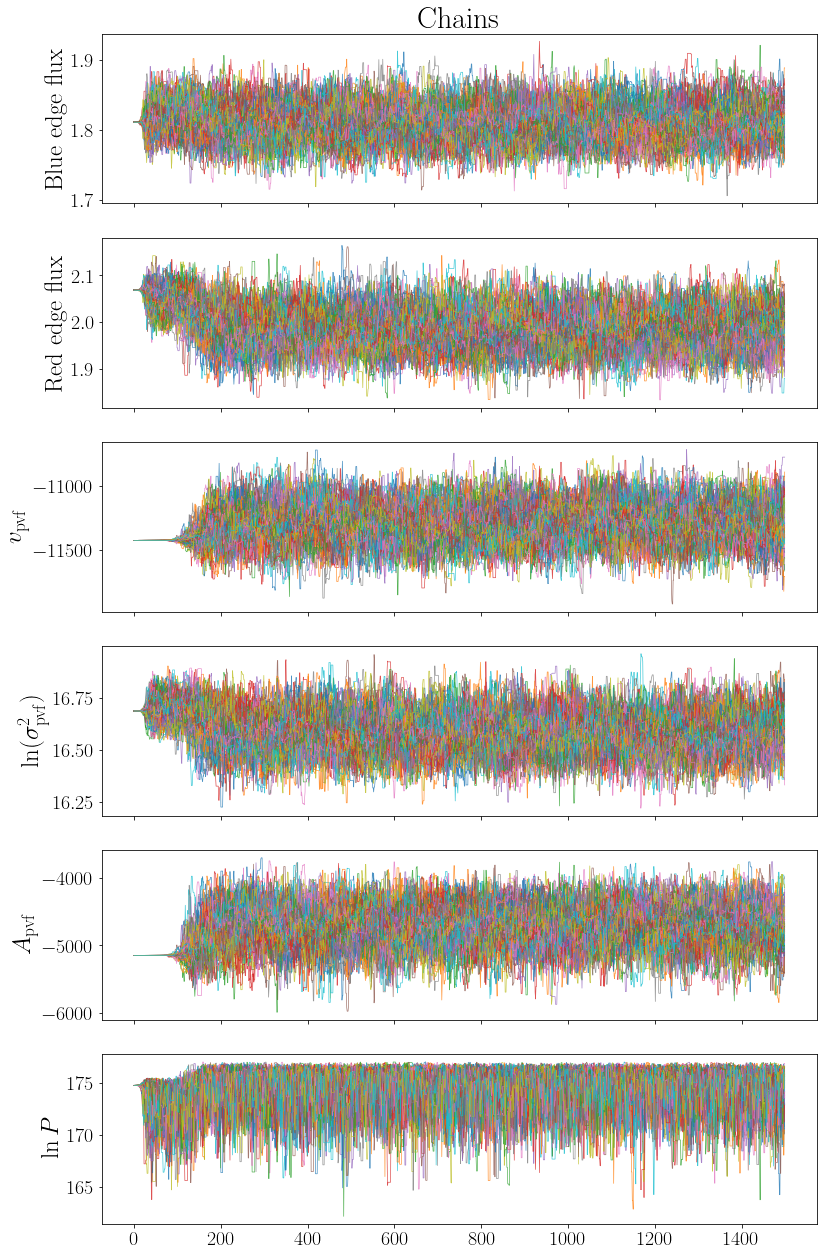

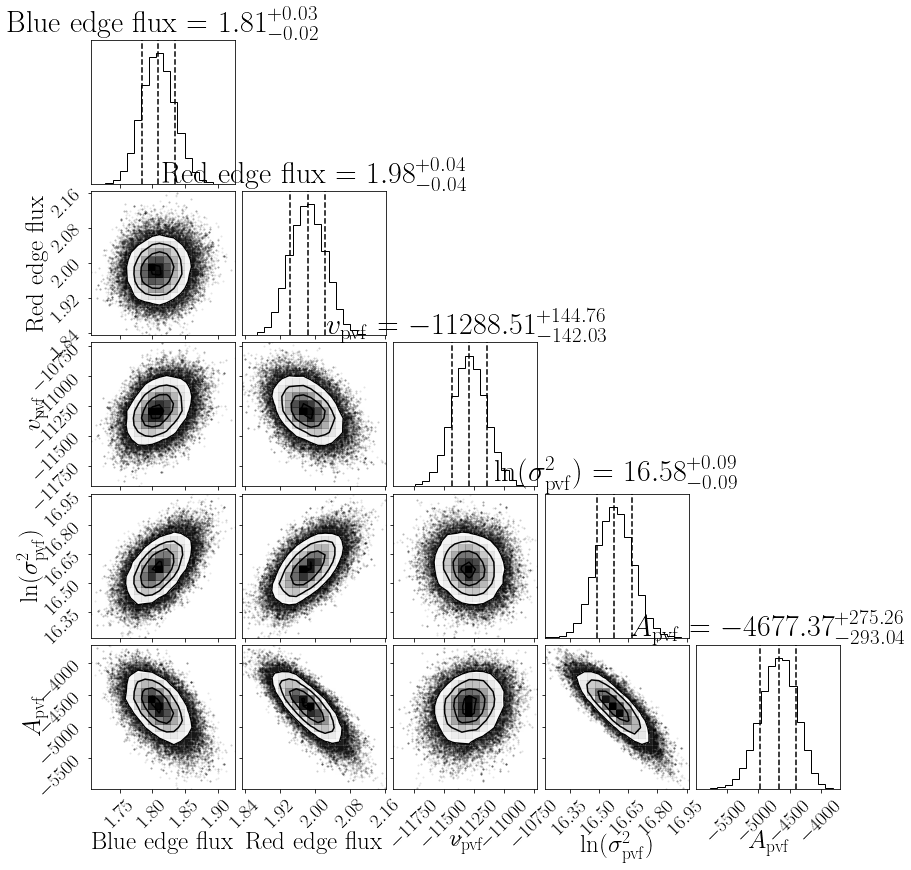

In [8]:
vel.plot_MCMC(sampler, 200)

## Ca II IRT

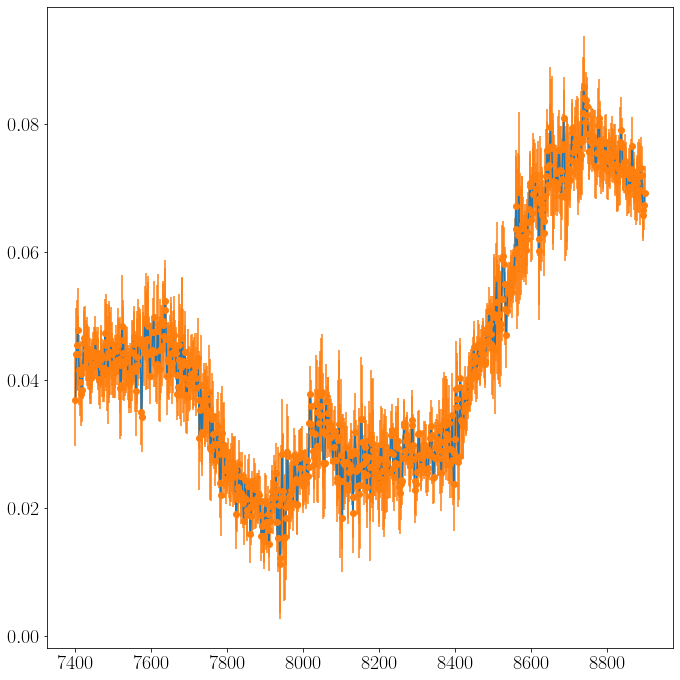

In [9]:
Spec1.plot_line_region(7400, 8900)

In [10]:
Spec1.add_line('CaII_IRT', 7600, 8700, lines=[8498.018, 8542.089, 8662.140])

567 points within 7600.00 and 8700.00 angstroms.


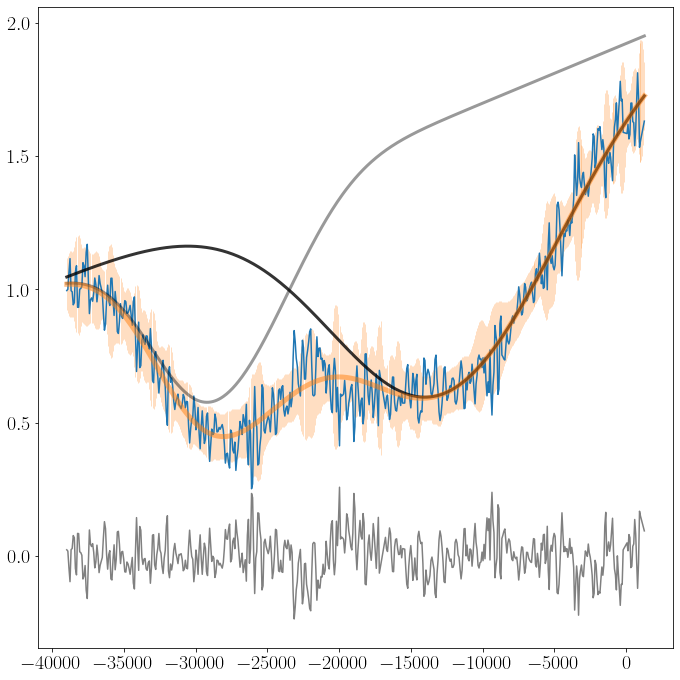

[ 1.95065080e+00  1.04945813e+00 -9.24858060e+03  1.78534670e+01
 -6.80714488e+03 -2.48334930e+04  1.64059339e+01 -2.61669502e+03]


In [11]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

100%|██████████| 3000/3000 [01:13<00:00, 40.99it/s]


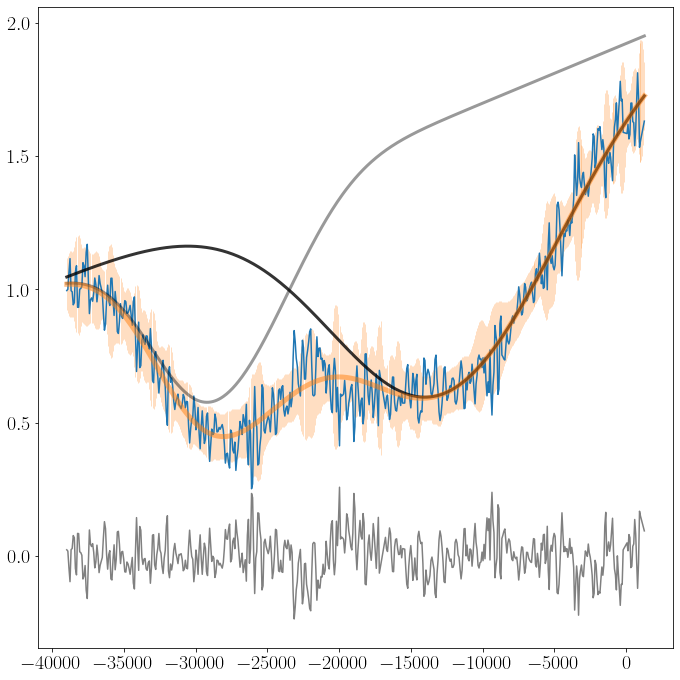

[ 1.66633018e+00  1.13955225e+00 -1.08000182e+04  1.76518683e+01
 -5.37882854e+03 -2.54177098e+04  1.64176222e+01 -2.63958721e+03] [3.13515127e-02 4.72718881e-02 1.30558392e+02 8.48725425e-02
 3.14249119e+02 2.11270201e+02 1.53965559e-01 2.49984380e+02]


In [12]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              nburn=500, nsteps=3000)

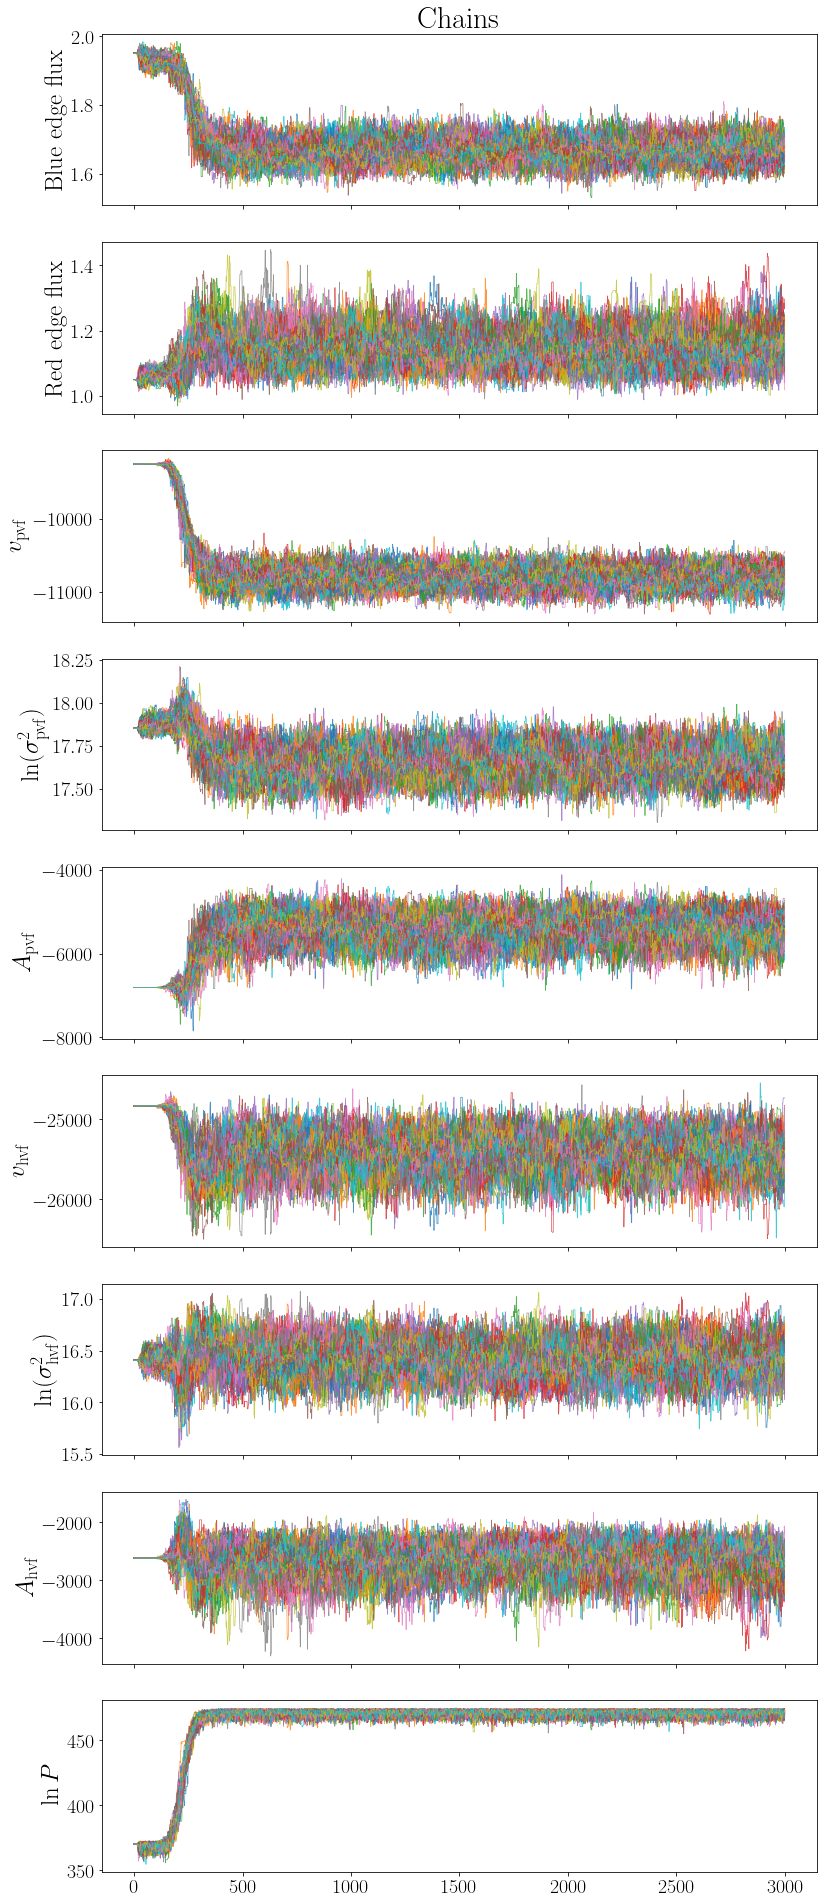

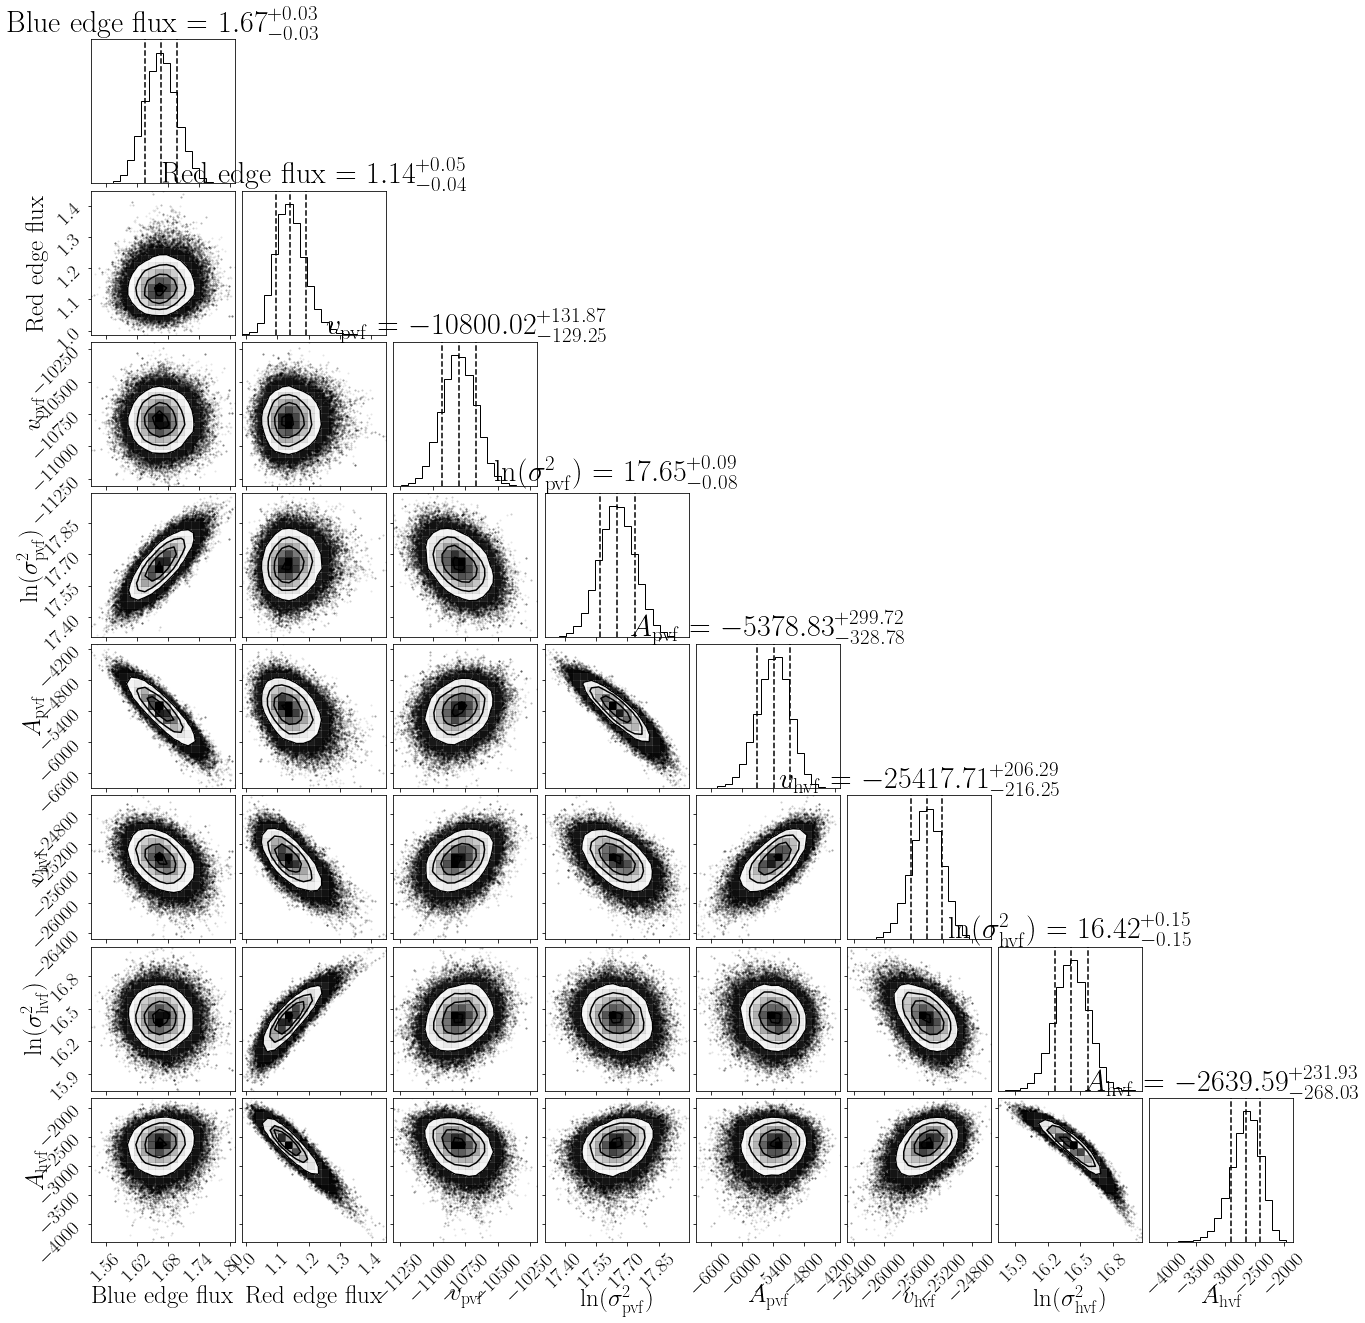

In [13]:
vel.plot_MCMC(sampler, 500)